In [ ]:
import warnings
import os
warnings.filterwarnings('ignore')

# Get all paths
data_dir_list = os.listdir("/content/drive/MyDrive/Colab Notebooks/CNN projrcts/Image classification svm/dataset")
print(data_dir_list)

['test.csv', 'shine', 'foggy', 'cloudy', 'rainy', 'sunrise', 'alien_test', 'test_preproc.np.npy']


In [ ]:
# Make new base directory
original_data_dir = '/content/drive/MyDrive/Colab Notebooks/CNN projrcts/Image classification svm/dataset '
base_dir ='/content/drive/MyDrive/Colab Notebooks/CNN projrcts/Image classification svm/weather_data/'
os.mkdir(base_dir)

In [ ]:
# create two folders (train and validation)
# train folder
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)

# Under train folder create five folders
# (cloudy, foggy, rainy, shine, sunrise)
train_cloud_dir = os.path.join(train_dir, 'cloudy')
os.mkdir(train_cloud_dir)

train_foggy_dir = os.path.join(train_dir, 'foggy')
os.mkdir(train_foggy_dir)

train_rainy_dir = os.path.join(train_dir, 'rainy')
os.mkdir(train_rainy_dir)

train_shine_dir = os.path.join(train_dir, 'shine')
os.mkdir(train_shine_dir)

train_sunrise_dir = os.path.join(train_dir, 'sunrise')
os.mkdir(train_sunrise_dir)

In [ ]:
# validation_folder
test_dir = os.path.join(base_dir, 'validation')
os.mkdir(test_dir)

# creating sub folders inside
lst = ['cloudy', 'foggy', 'rainy', 'shine', 'sunrise']
for i in lst:
  train_sub = os.path.join(test_dir, i)
  os.mkdir(train_sub)

In [ ]:
def split_data(source, training, validation, split_size):
  files=[]
  for filename in os.listdir(source):
    file = source +filename
    if os.path.getsize(file) > 0:
      files.append(filename)
    else:
      print(filename + "is zero length, so ignoring")

  training_length = int(len(files) * split_size)
  valid_length = int(len(files) - training_length)
  shuffled_set = random.sample(files, len(files))
  training_set = shuffled_set[0:training_length]
  validation_set = shuffled_set[training_length:]

  for filename in training_set:
    this_file = source + filename
    destination = training + filename
    copyfile(this_file, destination)

  for filename in validation_set:
    this_file = source + filename
    destination = validation + filename
    copyfile(this_file, destination)

In [ ]:
cloudy_source = '/content/drive/MyDrive/Colab Notebooks/CNN projrcts/Image classification svm/dataset/cloudy/'
train_cloud = '/content/drive/MyDrive/Colab Notebooks/CNN projrcts/Image classification svm/wather_data/train/cloudy/'
valid_cloud = '/content/drive/MyDrive/Colab Notebooks/CNN projrcts/Image classification svm/wather_data/validation/cloudy/'

foggy_source = '/content/drive/MyDrive/Colab Notebooks/CNN projrcts/Image classification svm/dataset/foggy/'
train_foggy = '/content/drive/MyDrive/Colab Notebooks/CNN projrcts/Image classification svm/wather_data/train/foggy/'
valid_foggy = '/content/drive/MyDrive/Colab Notebooks/CNN projrcts/Image classification svm/wather_data/validation/foggy/'

rainy_source = '/content/drive/MyDrive/Colab Notebooks/CNN projrcts/Image classification svm/dataset/rainy/'
train_rainy = '/content/drive/MyDrive/Colab Notebooks/CNN projrcts/Image classification svm/wather_data/train/rainy/'
valid_rainy = '/content/drive/MyDrive/Colab Notebooks/CNN projrcts/Image classification svm/wather_data/validation/rainy/'

shine_source = '/content/drive/MyDrive/Colab Notebooks/CNN projrcts/Image classification svm/dataset/shine/'
train_shine = '/content/drive/MyDrive/Colab Notebooks/CNN projrcts/Image classification svm/wather_data/train/shine/'
valid_shine = '/content/drive/MyDrive/Colab Notebooks/CNN projrcts/Image classification svm/wather_data/validation/shine/'

sunrise_source = '/content/drive/MyDrive/Colab Notebooks/CNN projrcts/Image classification svm/dataset/sunrise/'
train_sunrise = '/content/drive/MyDrive/Colab Notebooks/CNN projrcts/Image classification svm/wather_data/train/sunrise/'
valid_sunrise = '/content/drive/MyDrive/Colab Notebooks/CNN projrcts/Image classification svm/wather_data/validation/sunrise/'

In [ ]:
import random
from shutil import copyfile

split_size = .80

split_data(cloudy_source, train_cloud, valid_cloud, split_size)
split_data(foggy_source, train_foggy, valid_foggy, split_size)
split_data(rainy_source, train_rainy, valid_rainy, split_size)
split_data(shine_source, train_shine, valid_shine, split_size)
split_data(sunrise_source, train_sunrise, valid_sunrise, split_size)

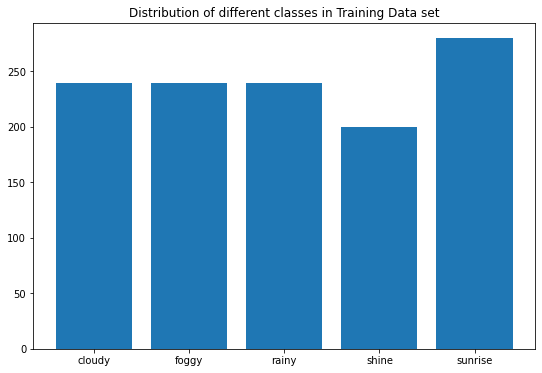

In [ ]:
from matplotlib import image
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.image import imread
import pathlib

image_folder = ['cloudy', 'foggy', 'rainy', 'shine', 'sunrise']
no_images = {}
for i in image_folder:
  n_images = len(os.listdir('/content/drive/MyDrive/Colab Notebooks/CNN projrcts/Image classification svm/wather_data/train/' + i + '/'))
  #print(n_images)
  no_images[i] = n_images

#len(no_images)

plt.figure(figsize = (9,6))
plt.bar(range(len(no_images)), list(no_images.values()), align = 'center')
plt.xticks(range(len(no_images)), list(no_images.keys()))
plt.title('Distribution of different classes in Training Data set')
plt.show()

In [ ]:
# Training distribution counts
for i in ['cloudy', 'foggy', 'rainy', 'shine', 'sunrise']:
  print(f'Training {i} images are: ' + str(len(os.listdir(
      '/content/drive/MyDrive/Colab Notebooks/CNN projrcts/Image classification svm/wather_data/train/' + i + '/')))) 

Training cloudy images are: 240
Training foggy images are: 240
Training rainy images are: 240
Training shine images are: 200
Training sunrise images are: 280


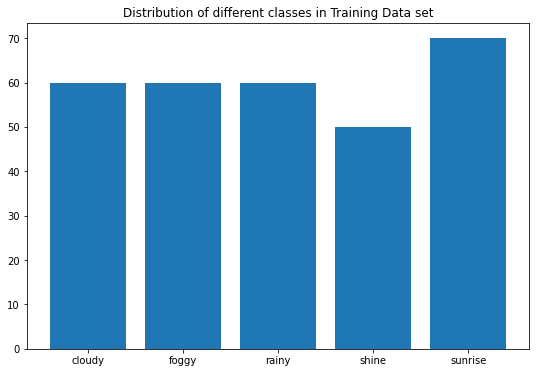

Training cloudy images are: 60
Training foggy images are: 60
Training rainy images are: 60
Training shine images are: 50
Training sunrise images are: 70


In [ ]:
# Distribution of validation data
image_folder = ['cloudy', 'foggy', 'rainy', 'shine', 'sunrise']
no_images = {}
for i in image_folder:
  n_images = len(os.listdir('/content/drive/MyDrive/Colab Notebooks/CNN projrcts/Image classification svm/wather_data/validation/' + i + '/'))
  #print(n_images)
  no_images[i] = n_images

#len(no_images)

plt.figure(figsize = (9,6))
plt.bar(range(len(no_images)), list(no_images.values()), align = 'center')
plt.xticks(range(len(no_images)), list(no_images.keys()))
plt.title('Distribution of different classes in Training Data set')
plt.show()

for i in ['cloudy', 'foggy', 'rainy', 'shine', 'sunrise']:
  print(f'Training {i} images are: ' + str(len(os.listdir(
      '/content/drive/MyDrive/Colab Notebooks/CNN projrcts/Image classification svm/wather_data/validation/' + i + '/'))))

# Data Augumentation

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [ ]:
! pip install tensorflow_hub

In [ ]:
import tensorflow_hub as hub

In [ ]:
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  try:
    # Currently, memory growth needs to be same across GPU
    for gpu in gpus:
      tf.config.experimental.set_memory_growth(gpu, True)
    logical_gpus  = tf.config.experimental.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus),"Logical GPUs")
  except RuntimeError as e:
    #Memory growth must be set before GPUs is initialized
    print(e)

print("Version: ", tf.__version__)
print("Eager mode: ", tf.executing_eagerly())
print("Hub version: ", hub.__version__)
print("GPU is", "available" if tf.config.list_physical_devices('GPU') else "Not Available")

1 Physical GPUs, 1 Logical GPUs
Version:  2.6.0
Eager mode:  True
Hub version:  0.12.0
GPU is available


In [ ]:
size = 256
batch_size =16

In [ ]:
training_dir = '/content/drive/MyDrive/Colab Notebooks/CNN projrcts/Image classification svm/wather_data/train/'

trainDatagen = ImageDataGenerator(rescale = 1/255.0,
                                  rotation_range= 30,
                                  zoom_range=0.4,
                                  horizontal_flip= True)

train_generator = trainDatagen.flow_from_directory(training_dir, batch_size=batch_size, 
                                                   class_mode='categorical',
                                                   target_size=(size,size))

Found 1200 images belonging to 5 classes.


In [ ]:
validation_dir = '/content/drive/MyDrive/Colab Notebooks/CNN projrcts/Image classification svm/wather_data/validation/'

validation_Datagen = ImageDataGenerator(rescale = 1/255.0)

validation_generator = validation_Datagen.flow_from_directory(validation_dir, batch_size=batch_size, 
                                                   class_mode='categorical',
                                                   target_size=(size,size))

Found 300 images belonging to 5 classes.


In [ ]:
# setting callbacks
callback = EarlyStopping(monitor = 'val_loss', patience = 5, mode= 'auto', verbose = 1)

# Auto save best model 
best_model_file = '/content/drive/MyDrive/Colab Notebooks/CNN projrcts/Image classification svm/wather_data/CNN_best_weights.h5'
checkpoint = ModelCheckpoint(best_model_file, monitor='val_acc', verbose =1, save_best_only=True)

# Callbacks
#class mycallback(tf.keras.callbacks.Callback):
#  def on_epoch_end(self, epoch, logs={}):
#    if(logs.get('accuracy')>0.90):
#      print("\nReached >90% accuracy so training is stopped!")
#      self.model.stop_training =True
#
#callbacks = mycallback()

In [ ]:
# model
model = Sequential([
                  Conv2D(16, (3,3), activation ='relu', input_shape =(size,size,3), padding='same'),
                  MaxPooling2D(),

                  Conv2D(32, (3,3), activation='relu',padding = 'same'),
                  MaxPooling2D((2,2), strides=(2,2), padding='same'),  
                  #Dropout(0.2),

                  Conv2D(64, (3,3), activation='relu',padding = 'same'),
                  MaxPooling2D((2,2), strides=(2,2), padding='same'),

                  Conv2D(64, (3,3), activation='relu',padding = 'same'),
                  MaxPooling2D((2,2), strides=(2,2), padding='same'),
                  #Dropout(0.2),

                  Conv2D(128, (3,3), activation='relu',padding = 'same'),
                  MaxPooling2D((2,2), strides=(2,2), padding='same'),

                  Conv2D(128, (3,3), activation='relu',padding = 'same'),
                  MaxPooling2D((2,2), strides=(2,2), padding='same'),
                  #Dropout(0.2),

                  Conv2D(256, (3,3), activation='relu',padding = 'same'),
                  MaxPooling2D((2,2), strides=(2,2), padding='same'),

                  Conv2D(256, (3,3), activation='relu',padding = 'same'),
                  MaxPooling2D((2,2), strides=(2,2), padding='same'),

                  Conv2D(256, (3,3), activation='relu',padding = 'same'),
                  MaxPooling2D((2,2), strides=(2,2), padding='same'), 
                 # Dropout(0.2),

                  Flatten(),
                  Dense(512, activation='relu'),
                  Dense(512, activation='relu'),
                  #Dense(5, activation='softmax')
                  #Dropout(0.2),
                  Dense(5, kernel_regularizer=tf.keras.regularizers.l2(0.01), activation='softmax')
])

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 256, 256, 16)      448       
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 128, 128, 16)      0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 128, 128, 32)      4640      
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 64, 64, 64)        18496     
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 32, 32, 64)       

In [ ]:
model.compile(optimizer='adam', 
              #loss='categorical_crossentropy',
              loss='squared_hinge',
              metrics = ['accuracy'])

In [ ]:
# Model fit
history = model.fit(train_generator, 
                    epochs=50,
                    verbose = 1,
                    validation_data= validation_generator#,
                    #callbacks=[callback, checkpoint]
                    )

Epoch 1/50
75/75 [==============================] - 34s 435ms/step - loss: 1.2528 - accuracy: 0.3192 - val_loss: 1.1836 - val_accuracy: 0.3767
Epoch 2/50
75/75 [==============================] - 32s 432ms/step - loss: 1.2027 - accuracy: 0.3625 - val_loss: 1.1763 - val_accuracy: 0.4067
Epoch 3/50
75/75 [==============================] - 32s 433ms/step - loss: 1.1945 - accuracy: 0.3742 - val_loss: 1.1596 - val_accuracy: 0.4133
Epoch 4/50
75/75 [==============================] - 32s 430ms/step - loss: 1.1926 - accuracy: 0.3933 - val_loss: 1.1567 - val_accuracy: 0.4167
Epoch 5/50
75/75 [==============================] - 33s 434ms/step - loss: 1.1687 - accuracy: 0.4300 - val_loss: 1.1322 - val_accuracy: 0.5033
Epoch 6/50
75/75 [==============================] - 32s 432ms/step - loss: 1.2277 - accuracy: 0.3400 - val_loss: 1.2307 - val_accuracy: 0.3467
Epoch 7/50
75/75 [==============================] - 32s 433ms/step - loss: 1.1914 - accuracy: 0.4033 - val_loss: 1.1757 - val_accuracy: 0.4167

In [ ]:
# Evaluate training
loss,accuracy = model.evaluate(train_generator)
print(f"Loss: {loss}")
print(f"Accuracy: {accuracy}") 

75/75 [==============================] - 29s 383ms/step - loss: 1.0171 - accuracy: 0.7242
Loss: 1.0170924663543701
Accuracy: 0.7241666913032532


In [ ]:
# Evaluate valiadation
loss,accuracy = model.evaluate(validation_generator)
print(f"Loss: {loss}")
print(f"Accuracy: {accuracy}") 

19/19 [==============================] - 3s 139ms/step - loss: 0.9987 - accuracy: 0.7433
Loss: 0.9986574053764343
Accuracy: 0.7433333396911621


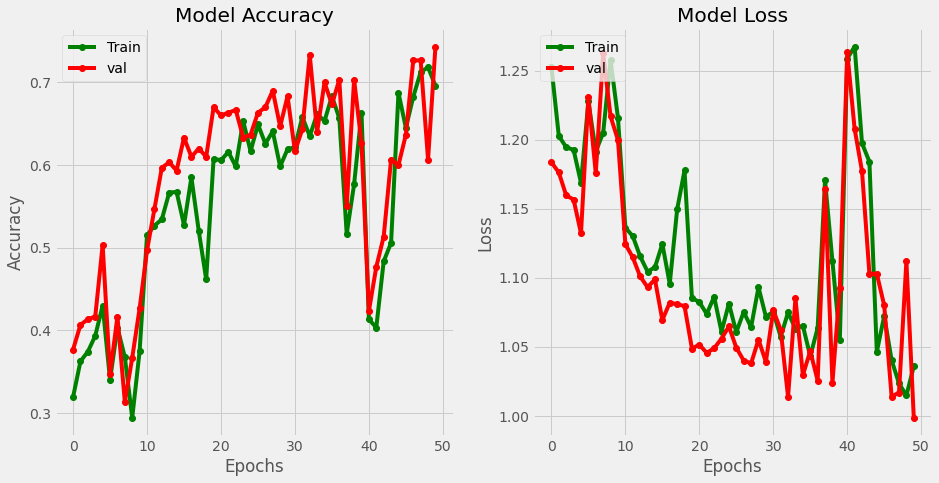

In [ ]:
#acc=history.history['accuracy']
#val_acc=history.history['val_accuracy']
#loss=history.history['loss']
#val_loss=history.history['val_loss']

epochs=range(len(history.history['accuracy']))

plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(14,7))

plt.subplot(1,2,1)
plt.plot(epochs,history.history["accuracy"],"go-")
plt.plot(epochs,history.history["val_accuracy"],"ro-")
plt.title("Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["Train","val"],loc = "upper left")

plt.subplot(1,2,2)
plt.plot(epochs,history.history["loss"],"go-")
plt.plot(epochs,history.history["val_loss"],"ro-")
plt.title("Model Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Train","val"],loc = "upper left")
plt.show()

In [ ]:
import pandas as pd
import numpy as np
from keras.preprocessing.image import load_img, img_to_array

In [ ]:
def preprocess_image(path):
  img = load_img(path, target_size=(size,size))
  a= img_to_array(img)
  a= np.expand_dims(a, axis=0)
  a /=255.
  
  return a

In [ ]:
# Read images dir and their labels
test_img_dir = '/content/drive/MyDrive/Colab Notebooks/CNN projrcts/Image classification svm/dataset/alien_test/'
test_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/CNN projrcts/Image classification svm/dataset/test.csv')

In [ ]:
# put them in a list
test_dflist = test_df['Image_id'].to_list()
test_ids = [str(item) for item in test_dflist]

In [ ]:
# Preprocessing test image 
test_images =[test_img_dir + item for item in test_ids]
test_preprocessed_images = np.vstack([preprocess_image(i) for i in test_images])
np.save('/content/drive/MyDrive/Colab Notebooks/CNN projrcts/Image classification svm/dataset/test_preproc.np', test_preprocessed_images)

In [ ]:
# Prediction
pred = model.predict(test_preprocessed_images, batch_size=1, verbose=1)
pred = np.argmax(pred, axis=1)
pred

30/30 [==============================] - 0s 4ms/step


array([1, 2, 3, 3, 1, 2, 2, 0, 0, 0, 4, 1, 1, 1, 2, 2, 2, 2, 0, 2, 3, 3,
       1, 4, 4, 4, 4, 4, 4, 4])

In [ ]:
# Defining y_true and y_pred
y_true = test_df['labels']
y_pred = pred

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.67      0.40      0.50        10
           2       0.62      0.83      0.71         6
           3       0.50      0.67      0.57         3
           4       0.88      1.00      0.93         7

    accuracy                           0.60        30
   macro avg       0.53      0.58      0.54        30
weighted avg       0.60      0.60      0.58        30

The confusion matrix: 
 [[0 1 1 2 0]
 [3 4 2 0 1]
 [1 0 5 0 0]
 [0 1 0 2 0]
 [0 0 0 0 7]]


(<Figure size 576x504 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fca3ac9bf90>)

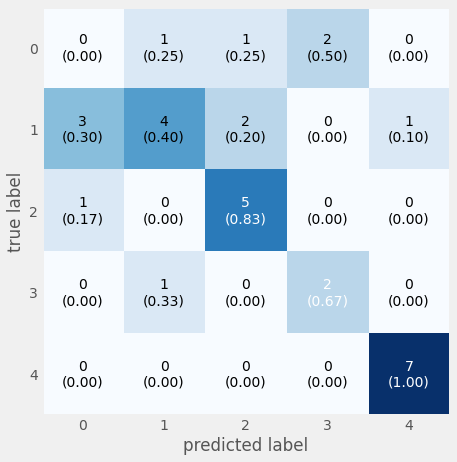

In [ ]:
# Evaluation of prediction

from sklearn.metrics import classification_report, confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

print(classification_report(y_true,y_pred))
cm = confusion_matrix(y_true, y_pred)
print("The confusion matrix: \n",cm)
plot_confusion_matrix(conf_mat = cm,figsize=(8,7),
                      show_normed = True)

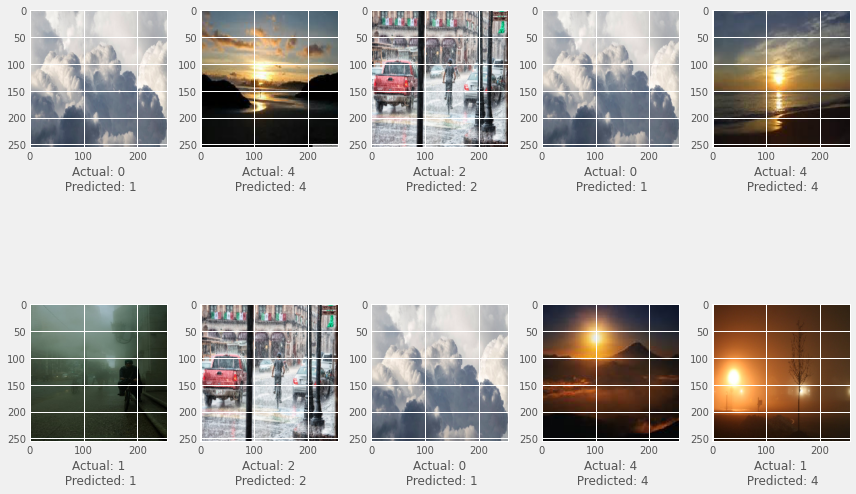

In [ ]:
import random

plt.figure(figsize=(12,9))
plt.style.use("ggplot")
for i in range(10):
    sample = random.choice(range(len(test_preprocessed_images)))
    plt.subplot(2,5,i+1)
    plt.subplots_adjust(hspace=0.3)
    plt.imshow(test_preprocessed_images[sample])
    plt.xlabel(f"Actual: {y_true[sample]}\n Predicted: {y_pred[sample]}")
    
plt.tight_layout()    
plt.show() 